# Convolution Neural Network (CNN)

[![image.png](https://i.postimg.cc/mrXbbMF6/image.png)](https://postimg.cc/t160kskh)

<br>

```text
Layers In A CNN
---------------
- Convolution: This layer learns the filter/kernel used to create feature maps.
- Poooling: This layer is used to reduce the spatial dimension of the image and increase the receptive field size.
- Fully connected: AKA ANN/FFN. It's used for making predictions.

Typical Architecture
--------------------
Conv -> Pool -> FFN
```

## Implementations

1. [Medium blog](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48)
2. [Notebook 1](https://colab.research.google.com/drive/1UD2RIXreLLgUDfLauJqR41QrLw3ufwbN#scrollTo=gHzKOZjnp0qn)

In [1]:
import sys

import numpy as np
import numpy.typing as npt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision
import torchvision.transforms as T
from torchsummary import summary

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000


import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats("svg")

from src.data_manager import (
    load_data,
    create_data_loader,
    split_into_train_n_validation,
)

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

/var/folders/ny/dl75sc_x2tb54lsymt5bh5p00000gn/T/ipykernel_42088/2501069088.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


### Load MNIST Digits Data

In [2]:
fp = "../../data/mnist_digit/mnist_train.csv"
mnist_data = load_data(filename=fp)

mnist_data.head()

Shape of data: (60000, 785)



,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [3]:
X = mnist_data.iloc[:, 1:]
y = mnist_data.iloc[:, 0]

X.shape, y.shape, y.unique()

((60000, 784), (60000,), array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8]))

In [4]:
X.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [5]:
# Normalize the data
X_norm = X / np.max(X, axis=None)

X_norm.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [6]:
# Reshape/transform the data to 2D (Required for CNNs)
# num_images, channel, image_width, image_breadth
X_norm = X_norm.to_numpy()
X_norm = X_norm.reshape(-1, 1, 28, 28)  # X_norm.reshape(X_norm.shape[0], 1, 28, 28)

X_T = torch.Tensor(X_norm)
y_T = torch.tensor(y).long()

X_T.shape, y_T.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([60000]))

In [7]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
BATCH_SIZE = 16

# Split data into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_T, y_T, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# Dataloader objects
train_DL, validation_DL = create_data_loader(
    X_train=X_train,
    X_validation=X_validation,
    y_train=y_train,
    y_validation=y_validation,
    batch_size=BATCH_SIZE,
)

### Size of Image At The Current Layer

$$ N = \lfloor{(\frac{M + 2p - k}{S})}\rfloor + 1$$

```text
N = Number of pixels in the current layer.
M = Number of pixels in the previous layer.
2p = Padding (it's multiplied by 2 because it's symmetric)
K = Number of pixels in the kernel/filter.
S = Stride parameter
⌊⌋ = floor (i.e 2.2 becomes 2.0)
```

<hr>

#### Docs

- [torch.max_pool2d](https://pytorch.org/docs/stable/generated/torch.nn.functional.max_pool2d.html)
- [torch.view](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)


```text
torch.view
----------
- It returns a new tensor with the same data as the self tensor but of a different shape.
```

<br>

### Model Architecture

[![image.png](https://i.postimg.cc/mrXbbMF6/image.png)](https://postimg.cc/t160kskh)

<br>


In [38]:
size_2 = np.floor((13 + (2 * 1) - 5) / 1) + 1  # = 11/2 = 5 (/2 cox of maxpool)


def calculate_size(
    pixels_prev_layer: int, padding: int, kernel: int, stride: int
) -> int:
    """This is used to calculate the size of the pixels at the current layer."""
    # Divide by 2 because of Avg/Max pooling
    size = (np.floor((pixels_prev_layer + (2 * padding) - kernel) / stride) + 1) / 2
    return size

In [39]:
calculate_size(pixels_prev_layer=28, padding=1, kernel=5, stride=1)

13.0

In [8]:
class CNNModel(nn.Module):
    def __init__(self, display_shape: bool = False) -> None:
        super().__init__()
        self.display_shape = display_shape
        # Conv layer
        self.conv_1 = nn.Conv2d(
            in_channels=1, out_channels=10, kernel_size=5, stride=1, padding=1
        )
        # size of the output of the conv layer (equation is shown above)
        # size_1 = np.floor((28 + (2*1) - 5) / 1 ) + 1 = 26/2 = 13 (/2 cox of maxpool)

        self.conv_2 = nn.Conv2d(
            in_channels=10, out_channels=20, kernel_size=5, stride=1, padding=1
        )
        # NB: 13 (this is the output of conv_1. i.e size_1)
        # size_2 = np.floor((13 + (2 * 1) - 5) / 1) + 1 = 11/2 = 5 (/2 cox of maxpool)

        # ========== Fully Connected Layer ==========
        # Compute the number of units in the FCLayer (i.e. output of conv_2)
        # NB: This FCLayer has no padding or stride
        expected_size = np.floor((5 + (2 * 0) - 1) / 1 + 1)
        # Find the square since it's symmetrical
        expected_size = 20 * int(np.square(expected_size))
        self.fc_layer_3 = nn.Linear(expected_size, 50)

        # ========== Output Layer ==========
        self.output = nn.Linear(50, 10)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """This is used to perform the forward propagation."""
        print(f"Input: {X.shape}") if self.display_shape else None
        # Conv -> Pool -> FCLayer
        X = F.relu(F.max_pool2d(input=self.conv_1(X), kernel_size=2))
        print(f"Layer Conv-Pool 1: {X.shape}") if self.display_shape else None

        # Conv -> Pool -> FCLayer
        X = F.relu(F.max_pool2d(input=self.conv_2(X), kernel_size=2))
        print(f"Layer Conv-Pool 2: {X.shape}") if self.display_shape else None

        # ========== Linear Layers ==========
        # Reshape the model for linear layer
        num_units = X.shape.numel() / X.shape[0]
        X = X.view(-1, int(num_units))
        print(f"Vectorized Layer: {X.shape}") if self.display_shape else None
        X = F.relu(self.fc_layer_3(X))
        print(f"FCLayer 3: {X.shape}") if self.display_shape else None
        X = self.output(X)
        print(f"Output Layer: {X.shape}") if self.display_shape else None
        return X

In [9]:
# Test the model with sample data
sapmle_data = torch.rand(size=(1000, 1, 28, 28))
model = CNNModel(display_shape=True)
model(sapmle_data)

Input: torch.Size([1000, 1, 28, 28])
Layer Conv-Pool 1: torch.Size([1000, 10, 13, 13])
Layer Conv-Pool 2: torch.Size([1000, 20, 5, 5])
Vectorized Layer: torch.Size([1000, 500])
FCLayer 3: torch.Size([1000, 50])
Output Layer: torch.Size([1000, 10])


tensor([[-0.0382, -0.0535,  0.0563,  ...,  0.0656,  0.0564, -0.0673],
        [-0.0504, -0.0727,  0.0660,  ...,  0.0684,  0.0641, -0.0786],
        [-0.0404, -0.0653,  0.0594,  ...,  0.0774,  0.0621, -0.0828],
        ...,
        [-0.0326, -0.0597,  0.0635,  ...,  0.0635,  0.0697, -0.0701],
        [-0.0373, -0.0549,  0.0754,  ...,  0.0724,  0.0462, -0.0847],
        [-0.0428, -0.0524,  0.0689,  ...,  0.0739,  0.0473, -0.0613]],
       grad_fn=<AddmmBackward0>)

In [10]:
# Total number of parameters in the model
summary(model, (1, 28, 28))

Input: torch.Size([2, 1, 28, 28])
Layer Conv-Pool 1: torch.Size([2, 10, 13, 13])
Layer Conv-Pool 2: torch.Size([2, 20, 5, 5])
Vectorized Layer: torch.Size([2, 500])
FCLayer 3: torch.Size([2, 50])
Output Layer: torch.Size([2, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             260
            Conv2d-2           [-1, 20, 11, 11]           5,020
            Linear-3                   [-1, 50]          25,050
            Linear-4                   [-1, 10]             510
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.12
Estimated Total Size (MB): 0.19
----------------------------------------------------------------


In [12]:
def train_model(
    *,
    train_dataloader: DataLoader,
    validation_dataloader: DataLoader,
    epochs: int,
    learning_rate: float = 0.01,
    optimizer_name: str = "Adam",
):
    """This is used to train the CNN model."""
    net: CNNModel = CNNModel()
    PCT: int = 100
    __optimizer__ = getattr(torch.optim, optimizer_name)
    optimizer = __optimizer__(params=net.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    train_loss: torch.Tensor = torch.zeros(size=(epochs,))
    train_accuracy: npt.ArrayLike[np.float_] = np.zeros(shape=(epochs,))
    validation_accuracy: npt.ArrayLike[np.float_] = np.zeros(shape=(epochs,))

    for epoch_idx in np.arange(epochs):
        net.train()
        batch_accuracy: list = []
        batch_loss: list = []

        for X_, y_ in train_dataloader:
            # Reset gradients
            optimizer.zero_grad()

            # Forward prop and loss
            y_proba = net(X_)
            loss = criterion(y_proba, y_)

            y_pred = torch.argmax(y_proba, dim=1)
            acc = torch.mean((y_ == y_pred).float()) * PCT
            batch_accuracy.append(acc.detach())

            batch_loss.append(loss.detach())

            # Backprop
            loss.backward()
            optimizer.step()

        # Train Metrics
        train_accuracy[epoch_idx] = np.mean(batch_accuracy)
        train_loss[epoch_idx] = np.mean(batch_loss, dtype="float64")

        # Validation Metrics
        net.eval()

        X_val, y_val = next(iter(validation_dataloader))
        y_proba_val = net(X_val)
        y_pred_val = torch.argmax(y_proba_val, dim=1)
        acc_ = torch.mean((y_pred_val == y_val).float()) * PCT
        validation_accuracy[epoch_idx] = acc_

    msg = f"Training epoch: {epoch_idx+1} / {epochs}"
    sys.stdout.write(f"\r{msg}")

    return (train_accuracy, validation_accuracy, train_loss, net)

In [13]:
train_accuracy, validation_accuracy, train_loss, net = train_model(
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=10,
    learning_rate=0.01,
    optimizer_name="Adam",
)

Training epoch:
10 / 10

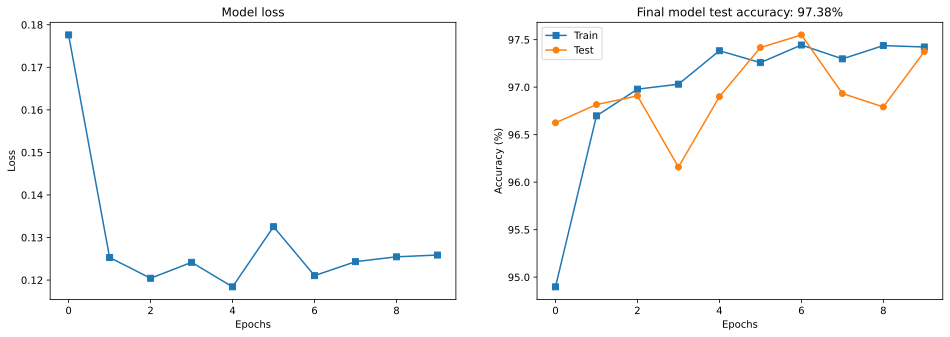

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(train_loss, "s-")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(train_accuracy, "s-", label="Train")
ax[1].plot(validation_accuracy, "o-", label="Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title(f"Final model test accuracy: {validation_accuracy[-1]:.2f}%")
ax[1].legend()

plt.show()

## Combine Sequential API and Class Approach

In [35]:
class CNNModel2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            # Conv -> Pool
            nn.Conv2d(
                in_channels=1, out_channels=10, kernel_size=5, stride=1, padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # Conv -> Pool
            nn.Conv2d(
                in_channels=10, out_channels=20, kernel_size=5, stride=1, padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # FCLayer
            nn.Flatten(),
            nn.Linear(20 * 5 * 5, 50),
            nn.ReLU(),
            nn.Linear(50, 10),
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """This is used to perform the forward propagation."""
        return self.layers(X)

In [36]:
# Test the model with sample data
sapmle_data = torch.rand(size=(1000, 1, 28, 28))
model = CNNModel2()
model(sapmle_data)

tensor([[ 0.0827, -0.1204,  0.0642,  ..., -0.0928,  0.0713, -0.1230],
        [ 0.0970, -0.1131,  0.0465,  ..., -0.0905,  0.0668, -0.1321],
        [ 0.0811, -0.1066,  0.0507,  ..., -0.0841,  0.0493, -0.1078],
        ...,
        [ 0.0809, -0.1110,  0.0520,  ..., -0.0984,  0.0663, -0.1237],
        [ 0.0929, -0.1224,  0.0469,  ..., -0.1033,  0.0766, -0.1290],
        [ 0.1056, -0.1014,  0.0445,  ..., -0.0954,  0.0681, -0.1345]],
       grad_fn=<AddmmBackward0>)

In [40]:
def train_model(
    *,
    train_dataloader: DataLoader,
    validation_dataloader: DataLoader,
    epochs: int,
    learning_rate: float = 0.01,
    optimizer_name: str = "Adam",
):
    """This is used to train the CNN model."""
    net: CNNModel2 = CNNModel()
    PCT: int = 100
    __optimizer__ = getattr(torch.optim, optimizer_name)
    optimizer = __optimizer__(params=net.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    train_loss: torch.Tensor = torch.zeros(size=(epochs,))
    train_accuracy: npt.ArrayLike[np.float_] = np.zeros(shape=(epochs,))
    validation_accuracy: npt.ArrayLike[np.float_] = np.zeros(shape=(epochs,))

    for epoch_idx in np.arange(epochs):
        net.train()
        batch_accuracy: list = []
        batch_loss: list = []

        for X_, y_ in train_dataloader:
            # Reset gradients
            optimizer.zero_grad()

            # Forward prop and loss
            y_proba = net(X_)
            loss = criterion(y_proba, y_)

            y_pred = torch.argmax(y_proba, dim=1)
            acc = torch.mean((y_ == y_pred).float()) * PCT
            batch_accuracy.append(acc.detach())

            batch_loss.append(loss.detach())

            # Backprop
            loss.backward()
            optimizer.step()

        # Train Metrics
        train_accuracy[epoch_idx] = np.mean(batch_accuracy)
        train_loss[epoch_idx] = np.mean(batch_loss, dtype="float64")

        # Validation Metrics
        net.eval()

        X_val, y_val = next(iter(validation_dataloader))
        y_proba_val = net(X_val)
        y_pred_val = torch.argmax(y_proba_val, dim=1)
        acc_ = torch.mean((y_pred_val == y_val).float()) * PCT
        validation_accuracy[epoch_idx] = acc_

    msg = f"Training epoch: {epoch_idx+1} / {epochs}"
    sys.stdout.write(f"\r{msg}")

    return (train_accuracy, validation_accuracy, train_loss, net)

In [43]:
train_accuracy, validation_accuracy, train_loss, net = train_model(
    train_dataloader=train_DL,
    validation_dataloader=validation_DL,
    epochs=10,
    learning_rate=0.01,
    optimizer_name="Adam",
)

Training epoch: 10 / 10

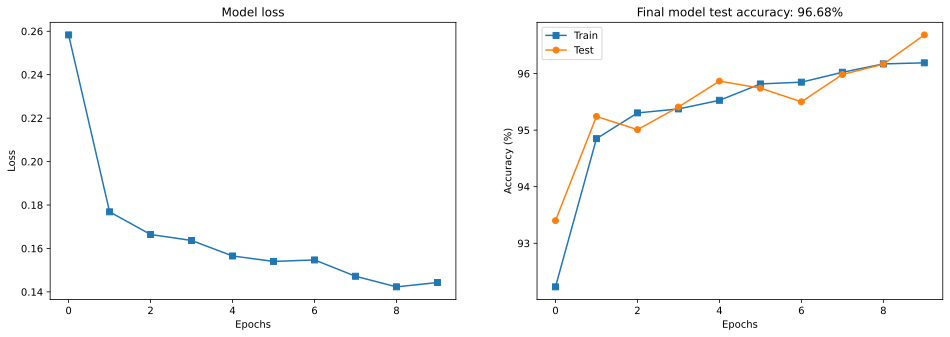

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(train_loss, "s-")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Model loss")

ax[1].plot(train_accuracy, "s-", label="Train")
ax[1].plot(validation_accuracy, "o-", label="Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title(f"Final model test accuracy: {validation_accuracy[-1]:.2f}%")
ax[1].legend()

plt.show()